In [1]:
%%time

import pandas as pd  # importa a lib Pandas. Essa lib é utilizada para lidar com dataframes (TABELAS) 
                     #de forma mais amigável.

from sklearn import datasets #sklearn é uma das lib mais utilizadas em ML, ela contém, além dos 
                            #datasets, várias outras funções úteis para a análise de dados
                            # essa lib será sua amiga durante toda sua carreira
        
from sklearn.model_selection import train_test_split,KFold,cross_val_score, cross_val_predict # esse método é utilizado para dividir o 
                                                    # conjunto de dados em grupos de treinamento e teste
    
from sklearn.svm import SVC      #importa o algoritmo svm para ser utilizado 
from sklearn import tree         # importa o algoritmo arvore de decisão
from sklearn.linear_model import LogisticRegression #importa o algoritmo de regressão logística
from sklearn.metrics import mean_absolute_error #utilizada para o calculo do MAE
from sklearn.metrics import mean_squared_error #utilizada para o calculo do MSE
from sklearn.metrics import r2_score #utilizada para o calculo do R2
from sklearn import metrics  #utilizada para as métricas de comparação entre os métodos

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

print('Bibliotecas carregadas!')


Bibliotecas carregadas!
CPU times: user 543 ms, sys: 193 ms, total: 735 ms
Wall time: 1.69 s


In [2]:
got_dataset=pd.read_csv('../input/game-of-thrones/character-predictions.csv')  #realiza a leitura do dataset

In [3]:
got_dataset.info() #conhecendo o dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No               1946 non-null   int64  
 1   actual             1946 non-null   int64  
 2   pred               1946 non-null   int64  
 3   alive              1946 non-null   float64
 4   plod               1946 non-null   float64
 5   name               1946 non-null   object 
 6   title              938 non-null    object 
 7   male               1946 non-null   int64  
 8   culture            677 non-null    object 
 9   dateOfBirth        433 non-null    float64
 10  DateoFdeath        444 non-null    float64
 11  mother             21 non-null     object 
 12  father             26 non-null     object 
 13  heir               23 non-null     object 
 14  house              1519 non-null   object 
 15  spouse             276 non-null    object 
 16  book1              1946 

In [4]:
got_dataset.head()  #mostrando o dataset

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


In [6]:
got_dataset.shape

(1946, 33)

In [5]:
nans = got_dataset.isna().sum() #contando a quantidade de valores nulos
nans[nans > 0]

title            1008
culture          1269
dateOfBirth      1513
DateoFdeath      1502
mother           1925
father           1920
heir             1923
house             427
spouse           1670
isAliveMother    1925
isAliveFather    1920
isAliveHeir      1923
isAliveSpouse    1670
age              1513
dtype: int64

In [7]:
#Tamanho do dataset
len(got_dataset)

1946

In [11]:
# conhecendo o nosso dataset 
got_dataset.describe()

,S.No,actual,pred,alive,plod,male,dateOfBirth,DateoFdeath,book1,book2,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,433.000000,444.000000,1946.000000,1946.000000,...,23.000000,276.000000,1946.000000,1946.000000,433.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,973.500000,0.745632,0.687050,0.634470,0.365530,0.619219,1577.364896,2950.193694,0.198356,0.374615,...,0.652174,0.778986,0.141829,0.460946,-1293.563510,0.305755,0.074512,0.059096,0.089584,0.745632
std,561.906131,0.435617,0.463813,0.312637,0.312637,0.485704,19565.414460,28192.245529,0.398864,0.484148,...,0.486985,0.415684,0.348965,0.498601,19564.340993,1.383910,0.262669,0.235864,0.160568,0.435617
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-28.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-298001.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,487.250000,0.000000,0.000000,0.391250,0.101000,0.000000,240.000000,282.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.013378,0.000000
50%,973.500000,1.000000,1.000000,0.735500,0.264500,1.000000,268.000000,299.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.033445,1.000000
75%,1459.750000,1.000000,1.000000,0.899000,0.608750,1.000000,285.000000,299.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,50.000000,0.000000,0.000000,0.000000,0.086957,1.000000
max,1946.000000,1.000000,1.000000,1.000000,1.000000,1.000000,298299.000000,298299.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,100.000000,15.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# analisando os dados nulos
print(got_dataset["age"].mean())   #possível erro no nosso dataset (média negativa para a idade?)

-1293.5635103926097


In [15]:
# realizando uma maior análise do dataset
print(got_dataset["name"][got_dataset["age"] < 0])
print(got_dataset['age'][got_dataset['age'] < 0])

1684    Doreah
1868    Rhaego
Name: name, dtype: object
1684   -277980.0
1868   -298001.0
Name: age, dtype: float64


In [16]:
# ed colunas com age abaixo de zero
got_dataset[got_dataset['age'] <0][['name','age']]


,name,age
1684,Doreah,-277980.0
1868,Rhaego,-298001.0


In [17]:
#substituindo os valores negativos
got_dataset.loc[1684, "age"] = 25.0 ### Doreah.. no google diz 24 anos na 1a temporada
got_dataset.loc[1868, "age"] = 0.0  ### Rhaego, morreu antes de "nascer"

In [19]:
print(got_dataset["age"].mean())   #verificando, novamente, a idade. Consertou a cagada!

36.70438799076212


In [20]:
#trabalhando com dados nulos
got_dataset["age"].fillna(got_dataset["age"].mean(), inplace=True) #substituindo os valores nulos pela média da coluna
got_dataset["culture"].fillna("", inplace=True) #preenchendo os valores nulos da coluna cultura com uma string nula

# preenchendo os demais valores com -1
got_dataset.fillna(value=-1, inplace=True) ### um flag apenas, para saber ao analisar futuramente

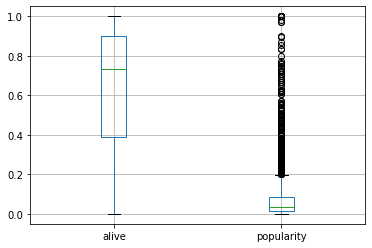

In [22]:
#realizando o boxplot 
got_dataset.boxplot(['alive','popularity']); ### o ';' evita de uma linha de código scape

### popularity é entre 0 e 1... não é considerado problema pois tem personagens mais populares que outros

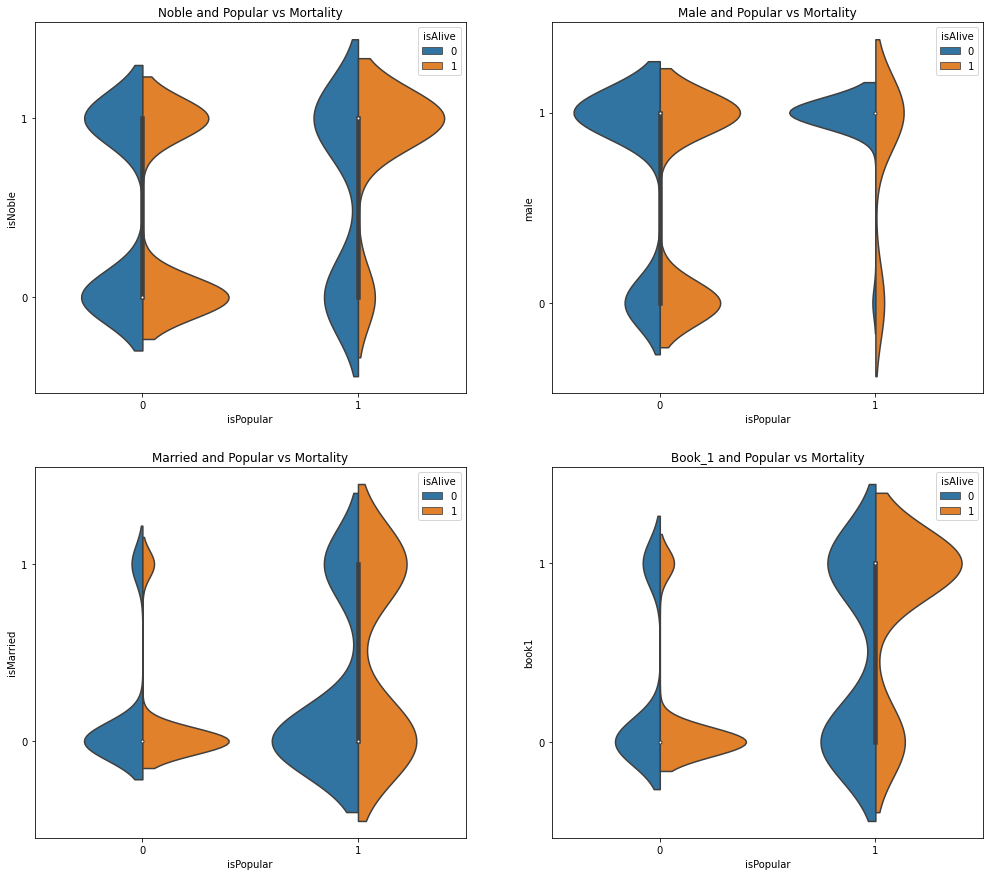

In [23]:
#analisando a "mortalidade" dos personagens
import warnings
warnings.filterwarnings('ignore')
f,ax=plt.subplots(2,2,figsize=(17,15))
sns.violinplot("isPopular", "isNoble", hue="isAlive", data=got_dataset ,split=True, ax=ax[0, 0])
ax[0, 0].set_title('Noble and Popular vs Mortality')
ax[0, 0].set_yticks(range(2))

sns.violinplot("isPopular", "male", hue="isAlive", data=got_dataset ,split=True, ax=ax[0, 1])
ax[0, 1].set_title('Male and Popular vs Mortality')
ax[0, 1].set_yticks(range(2))

sns.violinplot("isPopular", "isMarried", hue="isAlive", data=got_dataset ,split=True, ax=ax[1, 0])
ax[1, 0].set_title('Married and Popular vs Mortality')
ax[1, 0].set_yticks(range(2))


sns.violinplot("isPopular", "book1", hue="isAlive", data=got_dataset ,split=True, ax=ax[1, 1])
ax[1, 1].set_title('Book_1 and Popular vs Mortality')
ax[1, 1].set_yticks(range(2))


plt.show()

In [24]:
# Retirando algumas colunas 
drop = ["S.No", "pred", "alive", "plod", "name", "isAlive", "DateoFdeath"]
got_dataset.drop(drop, inplace=True, axis=1)

#Salvando uma cópia do dataset para aplicar o hotencoder
got_dataset_2 = got_dataset.copy(deep=True)

In [25]:
# transformando os dados categóricos em one-hot-encoder
got_dataset = pd.get_dummies(got_dataset)

In [27]:
got_dataset.shape  ### amtes tinha 33.. dropou 7... dummiou todo o df e ficou com 1012. PQP!

(1946, 1012)

In [26]:
got_dataset.head()

,actual,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,...,spouse_Walton Frey,spouse_Whalen Frey,spouse_Willam Dustin,spouse_Wylis Manderly,spouse_Wynafrei Whent,spouse_Yandry,spouse_Ynys Yronwood,spouse_Ysilla,spouse_Ysilla Royce,spouse_Zhoe Blanetree
0,0,1,-1.0,0,0,0,0,0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,208.0,1,1,1,1,1,-1.0,-1.0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,-1.0,0,0,0,1,0,-1.0,-1.0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,82.0,0,0,0,0,0,-1.0,-1.0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,276.0,0,0,0,1,0,-1.0,-1.0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Separando o dataset entre entradas e saídas
x = got_dataset.iloc[:,1:].values  #### iloc... todas as linha":" e da segunda coluna "1" em diante
y = got_dataset.iloc[:, 0].values ### todas as linhas e somente a primeira coluna

In [33]:
# verificando a cara do x e y
x

array([[  1.,  -1.,   0., ...,   0.,   0.,   0.],
       [  1., 208.,   1., ...,   0.,   0.,   0.],
       [  1.,  -1.,   0., ...,   0.,   0.,   0.],
       ...,
       [  1.,  -1.,   1., ...,   0.,   0.,   0.],
       [  1.,  -1.,   0., ...,   0.,   0.,   0.],
       [  1., 220.,   0., ...,   0.,   0.,   0.]])

In [34]:
y

array([0, 1, 1, ..., 1, 1, 0])

In [35]:
# aplicando o modelo de validação cruzada
# divide o dataset entre 5 diferentes grupos
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [38]:
print(kfold.get_n_splits()) ### quantas divisões? Quantos conjuntos de datasets?

5


In [39]:
# construindo os modelos de classificação
modelos = [LogisticRegression(solver='liblinear'), RandomForestClassifier(n_estimators=400, random_state=42), 
          DecisionTreeClassifier(random_state=42), svm.SVC(kernel='rbf', gamma='scale', random_state=42), 
          KNeighborsClassifier()]

In [40]:
#utilizando a validação cruzada
mean=[]
std=[]
for model in modelos:
    result = cross_val_score(model, x, y, cv=kfold, scoring="accuracy", n_jobs=-1)
    mean.append(result)
    std.append(result)

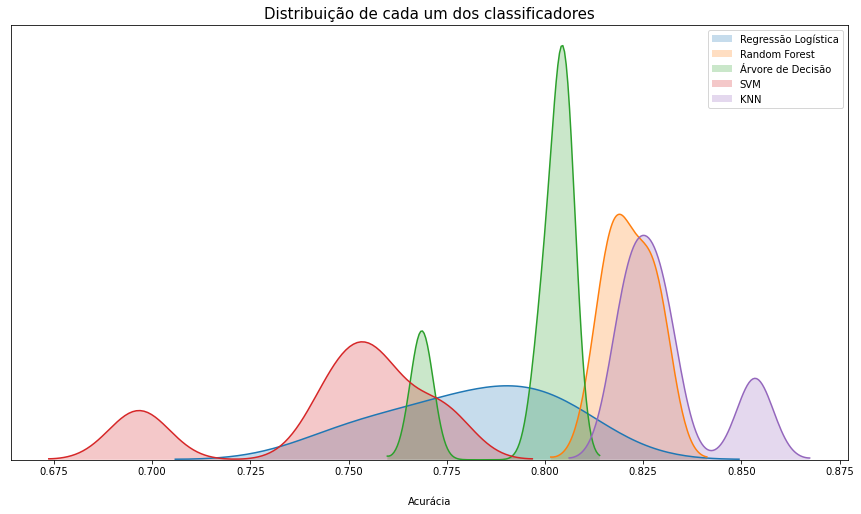

In [45]:
classificadores=['Regressão Logística', 'Random Forest', 'Árvore de Decisão', 'SVM', 'KNN']

plt.figure(figsize=(15, 8))
for i in range(len(mean)):
    sns.distplot(mean[i], hist=False, kde_kws={"shade": True})
    
plt.title("Distribuição de cada um dos classificadores", fontsize=15)
plt.legend(classificadores)
plt.xlabel("Acurácia", labelpad=20)
plt.yticks([])

plt.show()

**Realizando a previsão dos classificadores**

** Quais algoritmos escollher?**

In [49]:
# Dividindo o dataset entre treinamento 80% e teste 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, 
                                                    shuffle=True, random_state=42)

In [54]:
#escolhendo o svm 
svm_clf = svm.SVC(C=0.9, gamma=0.1, kernel='rbf', probability=True, random_state=42)



In [56]:
#escolhendo floresta randomica
rf_clf = RandomForestClassifier(n_estimators=400, n_jobs=-1, random_state=42)

In [57]:
# Treina o svm
svm_clf.fit(x_train, y_train)


RandomForestClassifier(n_estimators=400, n_jobs=-1, random_state=42)

In [ ]:
# Treina o RandomForest
rf_clf.fit(x_train, y_train)

In [52]:
# obtém as probabilidades previstas
svm_prob = svm_clf.predict_proba(x_test)
rf_prob = rf_clf.predict_proba(x_test)

# Valores reais
svm_preds = np.argmax(svm_prob, axis=1)
rf_preds = np.argmax(rf_prob, axis=1)

In [ ]:
#analisando os modelos 
cm = metrics.confusion_matrix(y_test, svm_preds)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm2 = metrics.confusion_matrix(y_test, rf_preds)
cm2 = cm2.astype('float') / cm2.sum(axis=1)[: , np.newaxis]

classes = ["Morto", "Vivo"]
f, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_title("SVM", fontsize=15.)
sns.heatmap(pd.DataFrame(cm, index=classes, columns=classes), 
            cmap='winter', annot=True, fmt='.2f', ax=ax[0]).set(xlabel="Previsao", ylabel="Valor Real")

ax[1].set_title("Random Forest", fontsize=15.)
sns.heatmap(pd.DataFrame(cm2, index=classes, columns=classes), 
            cmap='winter', annot=True, fmt='.2f', ax=ax[1]).set(xlabel="Previsao", 
                                                                ylabel="Valor Real")